# Create a CNN
    
This Notebook uses Keras to create a CNN model and train it.

In [4]:
# check python version
!python --version

Python 3.9.1


In [43]:
#Installation
!pip install scipy

     ---------------------------------------- 40.2/40.2 MB 8.4 MB/s eta 0:00:00


## 1. IMPORTS

In [1]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models 
from tensorflow.keras.preprocessing import image
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2 as cv

## PARAMS

## 2. PATHS

In [2]:
modelName = 'model_1.h5'
baseDir = 'workspace'
# Define Paths
paths = {
    'train': os.path.join(baseDir,'training_data'),
    'test': os.path.join(baseDir,'test_data'),
    # Training Data
    'trainDamBottle': os.path.join(baseDir,'training_data','dam_bottle'),
    'trainNormBottle': os.path.join(baseDir,'training_data','norm_bottle'),
    'trainDamLabel': os.path.join(baseDir,'training_data','dam_label'),
    'trainNormLabel': os.path.join(baseDir,'training_data','norm_label'),
    'trainOpenBottle': os.path.join(baseDir,'training_data','open_bottle'),
    'trainClosedBottle': os.path.join(baseDir,'training_data','closed_bottle'),
    # Testing Data
    'testDamBottle': os.path.join(baseDir,'test_data','dam_bottle'),
    'testNormBottle': os.path.join(baseDir,'test_data','norm_bottle'),
    'testDamLabel': os.path.join(baseDir,'test_data','dam_label'),
    'testNormLabel': os.path.join(baseDir,'test_data','norm_label'),
    'testOpenBottle': os.path.join(baseDir,'test_data','open_bottle'),
    'testClosedBottle': os.path.join(baseDir,'test_data','closed_bottle'),
    # Other Paths
    'model': os.path.join(baseDir,'models',modelName),
}
# Create Paths
for path in paths.values():
    if not os.path.exists(path):
        !mkdir {path}

1150.png


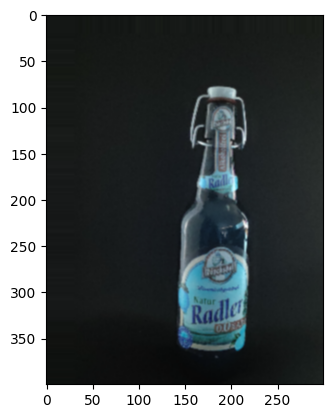

In [3]:
imgs= os.listdir(paths['testNormLabel'])
print(imgs[0])
plt.imshow(cv.imread(os.path.join(paths['testNormLabel'],imgs[10])))

## 3. Build Model

In [4]:
imgWidth = 150
imgHeight = 200

model = models.Sequential()

In [5]:
model.add(layers.Conv2D(32, (3, 3), strides=(2, 2), padding="same", activation='relu', input_shape=(imgWidth, imgHeight, 3)))

model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(layers.Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(Dropout(0.2))

model.add(layers.Conv2D(256, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))

model.add(Dropout(0.2))
model.add(layers.Dense(64, activation='softmax'))

model.add(layers.Dense(6))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 100, 32)       896       
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 100, 64)       18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 50, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 37, 50, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 50, 128)       73856     
                                                                 
 dropout_1 (Dropout)         (None, 37, 50, 128)       0         
                                                        

In [7]:
earlystop = EarlyStopping(patience=4)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
                                            
callbacks = [earlystop, learning_rate_reduction]


In [8]:
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['acc'])

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255, #Normierung Daten auf Intervall von 0 bis 1 fuer besseres Berechnen
    rotation_range=10, # Gradbereich um den Bilder zufällig gedreht werden
    width_shift_range=0.2, # Bereich als Bruchteil der Breite, in dem zufaellig verschoben wird
    height_shift_range = 0.2,  # Bereich als Bruchteil der Hoehe, in dem zufaellig verschoben wird
    shear_range = 0.2, # Bereich fuer zufaellige Scherung
    zoom_range = 0.2, # Bereich fuer zufaelliges Reinzoomen
    #horizontal_flip = True #zufaelliges horizintales Spiegeln
    )
# rescalen der Testdaten 
test_datagen = ImageDataGenerator(
    rescale = 1./255
    )

# laden der Bilder über den ImageDataGenerator 
train_generator = train_datagen.flow_from_directory(
    paths['train'],
    target_size=(imgWidth, imgHeight),
    batch_size  = 20,
    class_mode = 'binary' 
)

test_generator = test_datagen.flow_from_directory(
    paths['test'],
    target_size=(imgWidth, imgHeight),
    batch_size  = 20,
    class_mode = 'binary' 
)

Found 4329 images belonging to 6 classes.
Found 975 images belonging to 6 classes.


In [10]:
history = model.fit_generator(train_generator,
steps_per_epoch=40,
epochs = 20,
validation_data = test_generator,
validation_steps=20,
callbacks=callbacks
)

C:\Users\mariu\AppData\Local\Temp\ipykernel_17452\645884892.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/20
40/40 [==============================] - 111s 3s/step - loss: 16.2238 - acc: 0.1150 - val_loss: 22.0388 - val_acc: 0.1300 - lr: 0.0010
Epoch 2/20
40/40 [==============================] - 94s 2s/step - loss: 14.6150 - acc: 0.1275 - val_loss: 11.0260 - val_acc: 0.2350 - lr: 0.0010
Epoch 3/20
40/40 [==============================] - 109s 3s/step - loss: 10.8319 - acc: 0.1138 - val_loss: 19.3593 - val_acc: 0.1925 - lr: 0.0010
Epoch 4/20
40/40 [==============================] - ETA: 0s - loss: 10.0539 - acc: 0.1287
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
40/40 [==============================] - 98s 2s/step - loss: 10.0539 - acc: 0.1287 - val_loss: 12.4136 - val_acc: 0.2350 - lr: 0.0010
Epoch 5/20
40/40 [==============================] - 97s 2s/step - loss: 10.1310 - acc: 0.1063 - val_loss: 8.4339 - val_acc: 0.1225 - lr: 5.0000e-04
Epoch 6/20
40/40 [==============================] - ETA: 0s - loss: 9.9372 - acc: 0.1163
Epoch 6: ReduceLROnPlateau

In [ ]:
model.save(paths['model'])

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label='Trainingsgenauigkeit')
plt.plot(epochs,val_acc,'b',label='Validierungsgenauigkeit')
plt.title('Trainings und  Validierungsgenauigkeit')
plt.legend()

plt.figure()


plt.plot(epochs,loss,'bo',label='Trainings-Loss')
plt.plot(epochs,val_loss,'b',label='Validierungs-Loss')
plt.title('Trainings und  Validierungs-Loss')
plt.legend()

plt.figure()
